In [147]:
import json
import country_converter as coco
from datetime import datetime, timedelta
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Getting the data
# PAYLOAD = {'code': 'ALL'}
# URL = 'https://api.statworx.com/covid'
# RESPONSE = requests.post(url=URL, data=json.dumps(PAYLOAD))
# Convert the response to a data frame
covid_df = pd.read_csv('./archive/data.csv')
covid_df.head(3)

,country,during_pandemic,after_pandemic,1=low effect to reduce BSS usage and slightly continue use
0,United States of America,100,70,5=high effect to reduce BBS usage and strongly...
1,India,70,20,NaN
2,Hungary,30,20,NaN


In [148]:
# Setting the path to the shapefile
SHAPEFILE = './ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']


In [149]:
# geo_df.to_csv('sara.csv')

<AxesSubplot:>

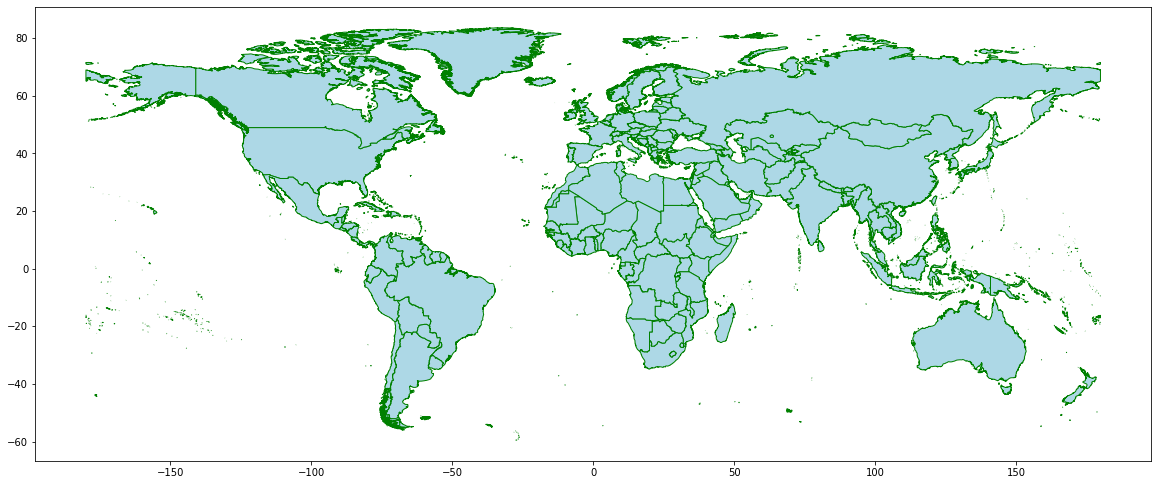

In [150]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='green', linewidth=1, color='lightblue')

In [151]:
# Next, we need to ensure that our data matches with the country codes. 
iso3_codes = geo_df['country'].to_list()
# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list
# There are some countries for which the converter could not find a country code. 
# We will drop these countries.
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


In [152]:
geo_df.loc[geo_df['country']=='South Africa']

,country,country_code,geometry,iso2_code
36,South Africa,ZAF,"MULTIPOLYGON (((19.98145 -24.75249, 19.98641 -...",ZA


In [153]:
covid_df

,country,during_pandemic,after_pandemic,1=low effect to reduce BSS usage and slightly continue use
0,United States of America,100,70,5=high effect to reduce BBS usage and strongly...
1,India,70,20,NaN
2,Hungary,30,20,NaN
3,Greece,20,100,NaN
4,Germany,80,60,NaN
...,...,...,...,...
238,Wallis and Futuna,0,0,NaN
239,Western Sahara,0,0,NaN
240,Yemen,0,0,NaN
241,Zambia,0,0,NaN


In [154]:
# We want to drop the history and only get the data from the last day
# d = datetime.today()-timedelta(days=1)
# date_yesterday = d.strftime("%Y-%m-%d")
# Preparing the data
# covid_df = covid_df[covid_df['date'] == date_yesterday]
# covid_df = pd.read_csv('./world_country_and_usa_states_latitude_and_longitude_values.csv')
# Merge the two dataframes
df = geo_df.merge(covid_df,on='country')
# Delete some columns that we won't use
# df = merged_df.drop(['day', 'month', 'year', 'country_y', 'code'], axis=1)
# #Create the indicator values
# df['case_growth_rate'] = round(df['cases']/df['cases_cum'], 2)
# df['case_growth_rate'].fillna(0, inplace=True) 
df.tail(10)

,country,country_code,geometry,iso2_code,during_pandemic,after_pandemic,1=low effect to reduce BSS usage and slightly continue use
197,Tuvalu,TUV,"MULTIPOLYGON (((179.19125 -8.54209, 179.20004 ...",TV,0,0,NaN
198,Maldives,MDV,"MULTIPOLYGON (((73.16310 -0.68182, 73.17254 -0...",MV,0,0,NaN
199,Nauru,NRU,"POLYGON ((166.93881 -0.49041, 166.95558 -0.497...",NR,0,0,NaN
200,Vanuatu,VUT,"MULTIPOLYGON (((169.84034 -20.14080, 169.86052...",VU,0,0,NaN
201,Niue,NIU,"POLYGON ((-169.85114 -18.96510, -169.82531 -18...",NU,0,0,NaN
202,American Samoa,ASM,"MULTIPOLYGON (((-170.59101 -14.26483, -170.576...",AS,0,0,NaN
203,Palau,PLW,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...",PW,0,0,NaN
204,Guam,GUM,"POLYGON ((144.88640 13.64020, 144.89666 13.617...",GU,0,0,NaN
205,Northern Mariana Islands,MNP,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",MP,0,0,NaN
206,Bahrain,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26...",BH,0,0,NaN


In [155]:
df.loc[df['country']=='South Africa']

,country,country_code,geometry,iso2_code,during_pandemic,after_pandemic,1=low effect to reduce BSS usage and slightly continue use
29,South Africa,ZAF,"MULTIPOLYGON (((19.98145 -24.75249, 19.98641 -...",ZA,50,70,NaN


0


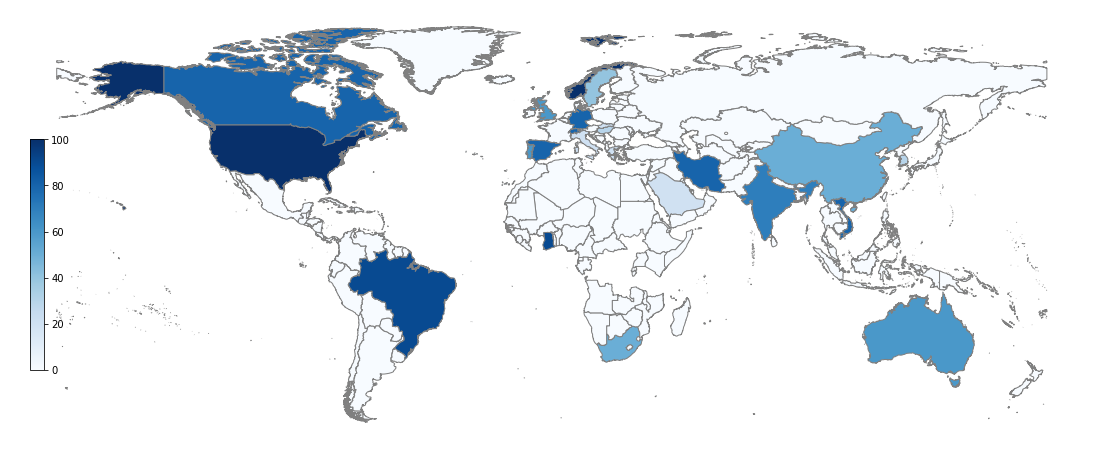

In [162]:
# Print the map
# Set the range for the choropleth
title = 'Usage Bike-sharing systems around the world'
col = 'during_pandemic'
source = 'Source: Table A1'
vmin = df[col].min()
print(vmin)
vmax = df[col].max()
cmap = 'Blues'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
df.plot(column=col, ax=ax, edgecolor='gray', linewidth=1, cmap=cmap)
# Add a title
# ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source
# ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
#             verticalalignment='bottom', fontsize=12)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

0


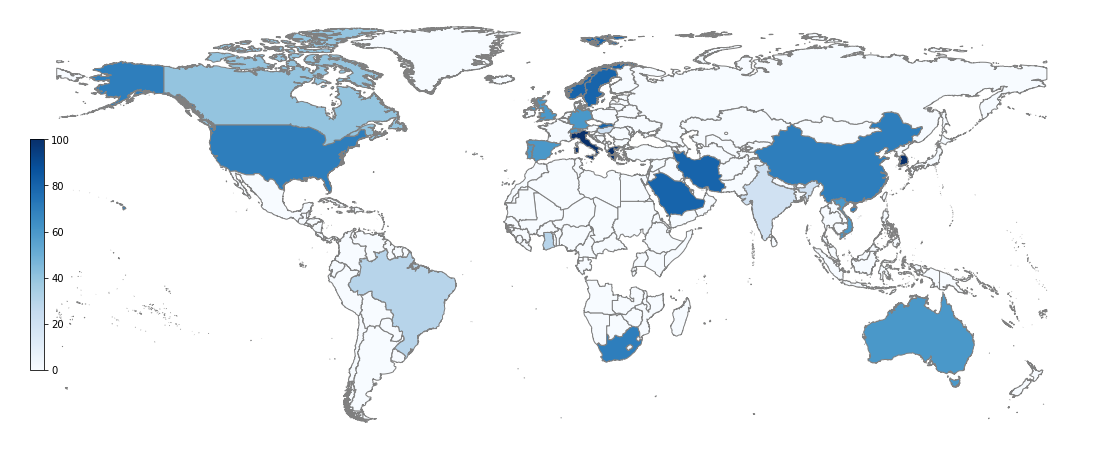

In [158]:
# Print the map
# Set the range for the choropleth
title = 'Usage Bike-sharing systems around the world'
col = 'after_pandemic'
source = 'Source: Table A1'
vmin = df[col].min()
print(vmin)
vmax = df[col].max()
cmap = 'Blues'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
df.plot(column=col, ax=ax, edgecolor='gray', linewidth=1, cmap=cmap)
# Add a title
# ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source
# ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
#             verticalalignment='bottom', fontsize=12)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)